In [1]:
#!pip install tensorflow


In [2]:
#!pip install numpy


In [3]:
#!pip install matplotlib

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [6]:
print(X_train.dtype)

uint8


In [7]:
#print(X_train)

In [8]:
print(X_train.shape)

(50000, 32, 32, 3)


In [3]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
Y_train.reshape(-1,)
Y_train.shape

(50000, 1)

'automobile'

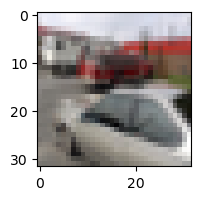

In [11]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[49999])
y=Y_train[49999]
classes[int(y)]
#plt.xlabel(classes[y_train[0]])

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

In [13]:
#X_train[1]

In [14]:
'''ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,Y_train,epochs=5)
'''
print('hello world')

hello world


In [60]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4470 - accuracy: 0.4764
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0954 - accuracy: 0.6111
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9530 - accuracy: 0.6667
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8571 - accuracy: 0.6975
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7775 - accuracy: 0.7260
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7093 - accuracy: 0.7496
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6464 - accuracy: 0.7725
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5902 - accuracy: 0.7934
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5434 - accuracy: 0.8075
Epoch 10/10
1563/1563 [==============================] - 34s 22m

In [24]:
y=Y_test[0]
classes[y]

'cat'

In [65]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0267 - accuracy: 0.6869


[1.026705265045166, 0.6869000196456909]

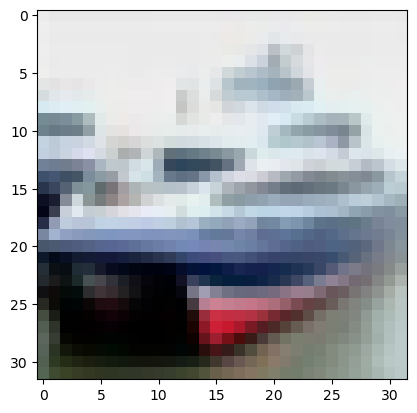

In [32]:
plt.figsize=[(10,2)]
plt.imshow(X_test[1])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_classes=[np.argmax(elements) for elements in y_predict]
y_classes[:5]

313/313 [==============================] - 3s 9ms/step


[3, 8, 1, 0, 6]

In [48]:
classes[Y_test[500]]

'deer'

In [50]:
classes[y_classes[500]]

'frog'

In [63]:
count=0
for i in range(len(Y_test)):
    if(Y_test[i]==y_classes[i]):
        count=count+1
print(count)

6869


In [64]:
6869/10000


0.6869

In [56]:
Y_test.shape

(10000,)